In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

# Prepare Dataset

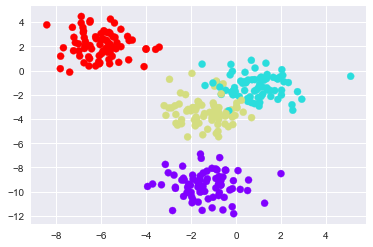

In [2]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=300, centers=4, random_state=2, cluster_std=1.0)

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [4]:
np.linspace(0, 10, 200)

array([ 0.        ,  0.05025126,  0.10050251,  0.15075377,  0.20100503,
        0.25125628,  0.30150754,  0.35175879,  0.40201005,  0.45226131,
        0.50251256,  0.55276382,  0.60301508,  0.65326633,  0.70351759,
        0.75376884,  0.8040201 ,  0.85427136,  0.90452261,  0.95477387,
        1.00502513,  1.05527638,  1.10552764,  1.15577889,  1.20603015,
        1.25628141,  1.30653266,  1.35678392,  1.40703518,  1.45728643,
        1.50753769,  1.55778894,  1.6080402 ,  1.65829146,  1.70854271,
        1.75879397,  1.80904523,  1.85929648,  1.90954774,  1.95979899,
        2.01005025,  2.06030151,  2.11055276,  2.16080402,  2.21105528,
        2.26130653,  2.31155779,  2.36180905,  2.4120603 ,  2.46231156,
        2.51256281,  2.56281407,  2.61306533,  2.66331658,  2.71356784,
        2.7638191 ,  2.81407035,  2.86432161,  2.91457286,  2.96482412,
        3.01507538,  3.06532663,  3.11557789,  3.16582915,  3.2160804 ,
        3.26633166,  3.31658291,  3.36683417,  3.41708543,  3.46

In [5]:
len(np.unique(y))

4

C:\Users\blue_\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


[(-12.653791862236549, 5.300815362305457),
 (-9.112031887200784, 5.787367452968137)]

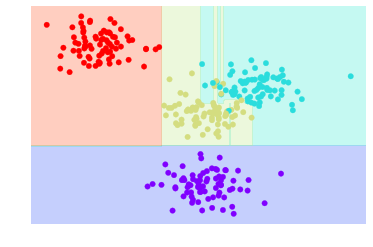

In [6]:
ax = plt.gca()  # 
ax.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap='rainbow',
           clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
ax.axis('off')

xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                     np.linspace(*ylim, num=200))
z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, z, alpha=0.3,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap='rainbow', clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)


In [57]:
import pandas as pd

In [58]:
titan_path = '../workspace/dataset/train.csv'
train_df = pd.read_csv(titan_path, index_col=0)

In [59]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train_df = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [61]:
train_df = train_df.replace('male', 1)
train_df = train_df.replace('female', 0)

In [62]:
train_df = train_df.dropna()

In [63]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


In [64]:
dataset_x = train_df[train_df.columns[1:]]
dataset_y = train_df['Survived']

In [65]:
len(dataset_x)

714

In [66]:
train_x = dataset_x[:-150]
train_y = dataset_y[:-150]

test_x = dataset_x[-150:]
test_y = dataset_y[-150:]

In [67]:
len(train_x), len(train_y), len(test_x), len(test_y)

(564, 564, 150, 150)

# Train Titan

In [68]:
tree = DecisionTreeClassifier()

In [69]:
tree.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
pred = tree.predict(test_x)

In [71]:
np.mean(pred == test_y)

0.8066666666666666

In [73]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
svm_pred = svm.predict(test_x)

In [75]:
np.mean(svm_pred == test_y)

0.7266666666666667